Setup & Data Recap

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,accuracy_score

In [5]:
df=pd.read_csv("WineQT.csv")

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Binary classification: Good wine (>5) vs Bad wine (<=5)

In [8]:
x=df.drop('quality',axis=1)
y=(df['quality']>5).astype(int)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Note: Decision Trees don't strictly require scaling, 
but we'll use scaled data to keep it consistent with Day 11.

In [11]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Training the "Overfitted" Tree

No max_depth limit = The tree grows until it memorizes everything

In [12]:
dt_unlimited=DecisionTreeClassifier(random_state=42)
dt_unlimited.fit(x_train_scaled,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

Check the scores

In [13]:
train_acc=dt_unlimited.score(x_train_scaled,y_train)
test_acc=dt_unlimited.score(x_test_scaled,y_test)

In [14]:
print(f"Unlimited Tree - Train Accuracy: {train_acc:.2f}")
print(f"Unlimited Tree - Trest Accuracy: {test_acc:.2f}")

Unlimited Tree - Train Accuracy: 1.00
Unlimited Tree - Trest Accuracy: 0.73


Observation: You’ll likely see 1.00 (100%) on Train and significantly lower on Test. This gap is the definition of High Variance (Overfitting).

Visualizing the Complexity

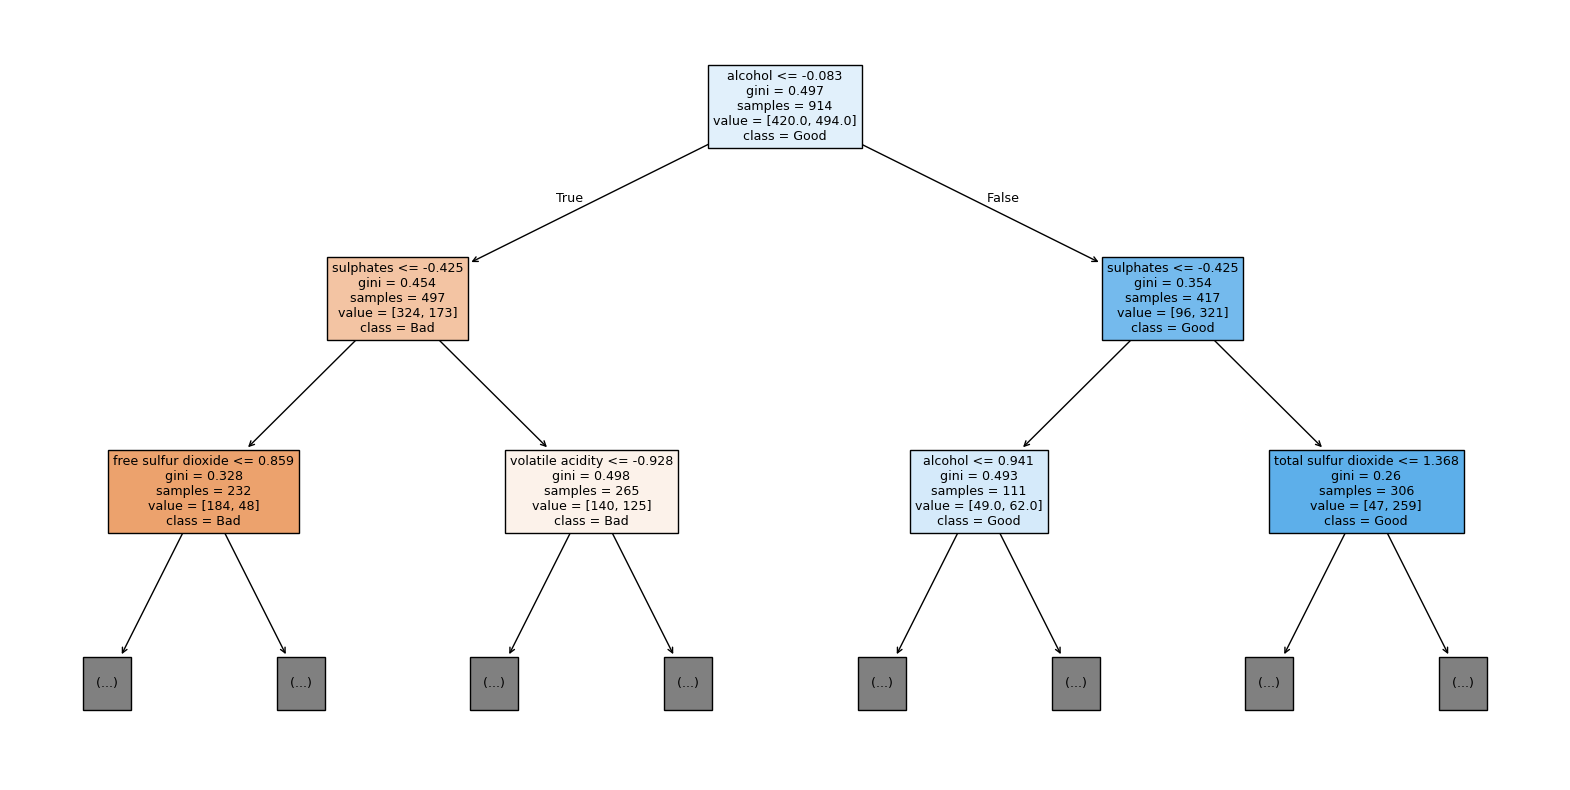

In [21]:
plt.figure(figsize=(20,10))
plot_tree(dt_unlimited,feature_names=x.columns,class_names=['Bad','Good'],filled=True,max_depth=2)
plt.show()

Let's restrict the tree to only 3 levels deep

In [24]:
dt_pruned=DecisionTreeClassifier(max_depth=3,random_state=42)
dt_pruned.fit(x_train_scaled,y_train)
print("Pruned Tree Results:")
print(f"Train Acc:{dt_pruned.score(x_train_scaled,y_train):.2f}")
print(f"Test Acc:{dt_pruned.score(x_test_scaled,y_test):.2f}")

Pruned Tree Results:
Train Acc:0.75
Test Acc:0.73


The Decision Rule: Unlike Logistic Regression (which uses a formula), Trees use Entropy or Gini Impurity to decide where to "cut" the data.

The Overfitting Trap: An unconstrained tree is like a student who memorizes the practice exam but fails the real one.

Pruning: By limiting max_depth, we stop the model from learning "noise" and force it to learn "patterns."

Pruning is the process of "cutting back" the branches of a tree to prevent it from getting too complex. Think of it like gardening: if you let a tree grow wild, it gets messy; if you prune it, it grows strong and healthy.

In Machine Learning, we call this reducing variance.

Here is how we find the "perfect" pruning point (the best max_depth) using a loop. This is a common interview task to test your understanding of the Bias-Variance Tradeoff.

Finding the Optimal Depth (The Loop)

In [26]:
train_scores=[]
test_scores=[]
depth_range=range(1,15)

for depth in depth_range:
    tree= DecisionTreeClassifier(max_depth=depth,random_state=42)
    tree.fit(x_train_scaled,y_train)
    train_scores.append(tree.score(x_train_scaled,y_train))
    test_scores.append(tree.score(x_test_scaled,y_test))

Plot the results

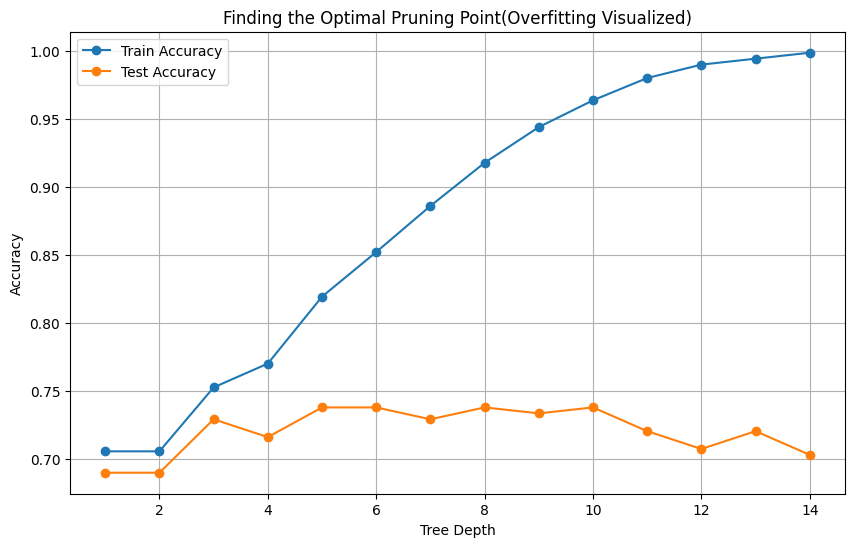

In [28]:
plt.figure(figsize=(10,6))
plt.plot(depth_range,train_scores,label='Train Accuracy',marker='o')
plt.plot(depth_range,test_scores,label='Test Accuracy',marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Finding the Optimal Pruning Point(Overfitting Visualized)')
plt.legend()
plt.grid(True)
plt.show()

Underfitting (Left Side): When the depth is very low (1 or 2), both Train and Test accuracy are low. The model is too simple to learn anything (High Bias).

The Sweet Spot (Middle): Look for the highest point on the orange (Test) line. This is your "Optimal Depth."

Overfitting (Right Side): As depth increases, the blue (Train) line keeps going up toward 100%, but the orange (Test) line starts to flatten or drop. The model is now just memorizing noise (High Variance).

Finalizing the Pruned Model

In [29]:
final_dt=DecisionTreeClassifier(max_depth=6,random_state=42)
final_dt.fit(x_train_scaled,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

Final report

In [32]:
y_pred_Final=final_dt.predict(x_test_scaled)
print("Final Pruned Decision Tree Report:")
print(classification_report(y_test,y_pred_Final))

Final Pruned Decision Tree Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       102
           1       0.78      0.73      0.76       127

    accuracy                           0.74       229
   macro avg       0.74      0.74      0.74       229
weighted avg       0.74      0.74      0.74       229



Pruning Technique: I used max_depth to control the growth of the tree.

Observation: By visualizing the "Elbow" in the accuracy plot, I identified that a depth of X provides the best generalization.

Comparison: Unlike Logistic Regression, the Decision Tree is better at capturing interactions between features (e.g., how pH and Alcohol work together).